# Symplecticity of numerical methods

Some simple symplectic methods (Euler-A, Euler-B and Störmer-Verlet) are compared against the non-symplectic explicit-Euler.

**References**:

[1] Benedict Leimkuhler and Sebastian Reich. *Simulating Hamiltonian Dynamics*. Cambridge Monographs on Applied and Computational Mathematics. Cambridge University Press, 2005.

[2] Ernst Hairer, Christian Lubich, and Gerhard Wanner. *Geometric Numerical Integration: Structure-Preserving Algorithms for Ordinary Diﬀerential Equations; 2nd ed*. Springer, Dordrecht, 2006.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams.update({'font.size': 12})

Consider the toy-example of a system of $N$-coupled 'ideal' oscillators with the Hamiltonian given by
$$ H = \sum_{i=1}^N \frac{\Vert\textbf{p}_i\Vert^2}{2m_i} + \sum_{i=1}^{N-1}\frac{k_i}{2}\Vert \textbf{q}_i - \textbf{q}_{i+1} \Vert^2, $$
where $\textbf{p}_i$ and $\textbf{q}_i$ give the momentum and position vector of the $i$-th oscillator respectively. To simplify the problem, take $m_i = 1, k_i = 1 ~ \forall i$, and consider it in one-dimension.

## Simple-Euler

For the non-symplectic simple-Euler method, consider the case for just one oscillator. Use the initial condition of $v^0 = \dot{q}^0 = 1$. The exact solutions are
$$ x(t) \equiv q(t) = \sin(t), $$
$$ v(t) = \cos(t), $$
$$ energy(t) = 0.5, $$
where $t$ is the time.

Time-stepping the simple-Euler is simple. Indexing the time-steps by $i$ and denoting the temporal step-size by $\Delta t$,
$$ x^{i+1} = x^i + \Delta t * v^i, $$
$$ v^{i+1} = v^i + \Delta t * a^i, $$
$$ a^i = -1. * x^i. $$

The plots for *displacement vs time*, and the *velocity vs displacement* are made, and it is clear that the method is not stable.

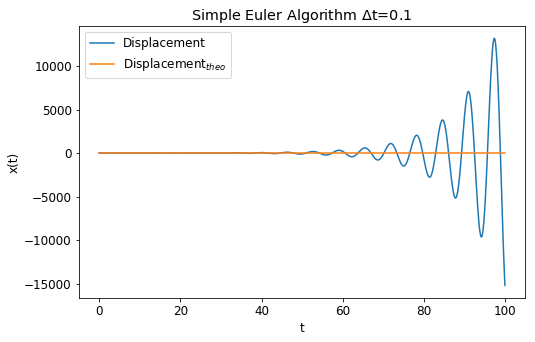

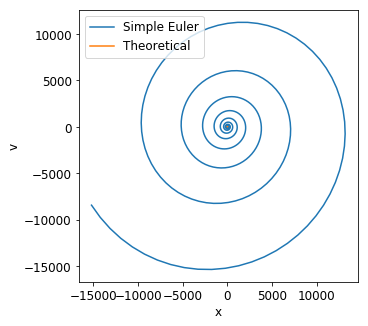

In [11]:
a = 0
dt = 0.1
j = 1000

x = np.zeros(j)
v = np.zeros(j)
t = np.arange(j)*dt
theo = np.sin(t)
vtheo = np.cos(t)

v[0] = 1

for i in range(j-1):
    x[i+1] = x[i] + v[i] * dt
    v[i+1] = v[i] + a * dt
    a = -1 * x[i]

f = plt.figure(figsize=(8,5))
plt.title('Simple Euler Algorithm $\Delta$t=0.1')
plt.xlabel('t')
plt.ylabel('x(t)')

plt.plot(t, x, label="Displacement")
plt.plot(t, theo, label="Displacement$_{theo}$")
plt.legend()
plt.show()

g = plt.figure(figsize=(5,5))
plt.plot(x,v, label="Simple Euler")
plt.plot(theo,vtheo, label="Theoretical")
plt.legend()
plt.xlabel("x")
plt.ylabel("v")
plt.show()
plt.close()

## Euler-A and Euler-B

Lets turn our attention to first-order symplectic methods, such as the Euler-A and Euler-B methods (aka symplectic-Euler methods). For the Euler-A method:
$$ x^{i+1} = x^i + \Delta t * v^i, $$
$$ v^{i+1} = v^i - \Delta t * x^{i+1}. $$

For the Euler-B method:
$$ v^{i+1} = v^i - \Delta t * x^{i}, $$
$$ x^{i+1} = x^i + \Delta t * v^{i+1}. $$

The same plots as for the simple-Euler method are made. The symplectic methods are stable, but the limitations of the first-order accuracy can be seen.

Percentage EulerB Max. Error: 5.26
Percentage EulerA Max. Error: 5.26


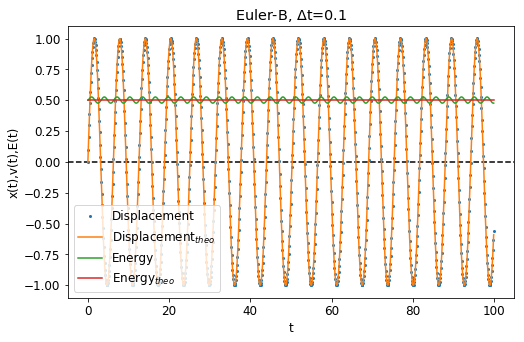

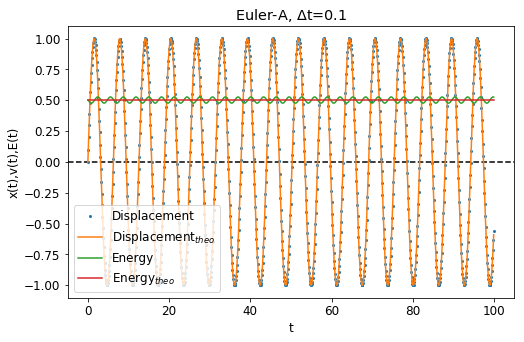

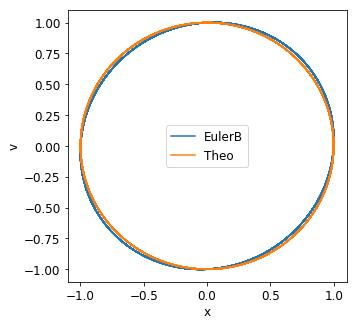

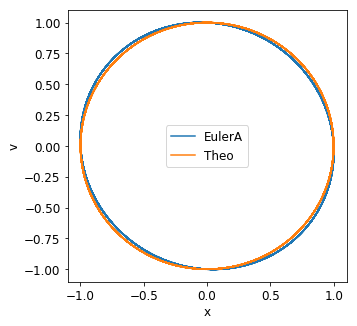

In [16]:
j = 1000
dt = 0.1
a = 0
t = np.arange(j)*dt
theo = np.sin(t)
vtheo = np.cos(t)

x1 = np.zeros(j)
x2 = np.zeros(j)
v1 = np.zeros(j)
v2 = np.zeros(j)
e1 = np.zeros(j)
e2 = np.zeros(j)
Etheo = np.ones(j)*0.5

v1[0] = 1.
v2[0] = 1.

# Get energy.
def energy(x,v): return 0.5 * (v*v + x*x)
# Get next x.
def next_x(x,v): return x + v * dt
# Get next v.
def next_v(v,a): return v - a * dt
    
# Symplectic-Euler.
for i in range(j-1):
    # Euler-B.
    v1[i+1] = next_v(v1[i],x1[i])
    x1[i+1] = next_x(x1[i],v1[i+1])
    
    # Euler-A.
    x2[i+1] = next_x(x2[i],v2[i])
    v2[i+1] = next_v(v2[i],x2[i+1])
    
    #energies.
    e1[i+1] = energy(x1[i],v1[i])
    e2[i+1] = energy(x2[i],v2[i])

e1[0] = 0.5
e2[0] = 0.5

# Plot figures.
f = plt.figure(figsize=(8,5))
plt.axhline(0, color='black', linestyle='--')

plt.plot(t, x1, 'o', label="Displacement", markersize=2)
plt.plot(t, theo, label="Displacement$_{theo}$")

plt.plot(t, e1, '-', label="Energy", markersize=5, markevery=10)
plt.plot([t[0],t[-1]],[0.5,0.5], label="Energy$_{theo}$")

#plt.plot(t, v1, label="Velocity", color="g")

plt.legend(loc=3)
plt.title('Euler-B, $\Delta$t=0.1')
plt.xlabel('t')
plt.ylabel('x(t),v(t),E(t)')

f.show()

g = plt.figure(figsize=(8,5))
plt.axhline(0, color='black', linestyle='--')

plt.plot(t, x2, 'o', label="Displacement", markersize=2)
plt.plot(t, theo, label="Displacement$_{theo}$")

plt.plot(t, e2, '-', label="Energy", markersize=5, markevery=10)
plt.plot([t[0],t[-1]],[0.5,0.5], label="Energy$_{theo}$")

#plt.plot(t, v2, label="Velocity")

plt.legend(loc=3)
plt.title('Euler-A, $\Delta$t=0.1')
plt.xlabel('t')
plt.ylabel('x(t),v(t),E(t)')
g.show()

pd1 = np.max(np.abs(Etheo[1:]-e1[1:]))/Etheo[0]*100
print('Percentage EulerB Max. Error: %.2f' %pd1)
pd2 = np.max(np.abs(Etheo[1:]-e2[1:]))/Etheo[0]*100
print('Percentage EulerA Max. Error: %.2f' %pd2)

h = plt.figure(figsize=(5,5))
plt.plot(x1,v1, label="EulerB")
plt.plot(theo,vtheo, label="Theo")
plt.legend()
plt.xlabel("x")
plt.ylabel("v")
plt.show()

l = plt.figure(figsize=(5,5))
plt.plot(x2,v2, label="EulerA")
plt.plot(theo,vtheo, label="Theo")
plt.legend()
plt.xlabel("x")
plt.ylabel("v")
plt.show()

## Störmer-Verlet method

A second-order accurate symplectic method is the Störmer-Verlet method. The time-stepping requires three substeps:
$$ v^{i+\frac{1}{2}} = v^{i} - 0.5 * \Delta t * x^{i}, $$
$$ x^{i+1} = x^i + \Delta t * v^{i+1}, $$
$$ v^{i+1} = v^{i+\frac{1}{2}} - 0.5 * \Delta t * x^{i+1}. $$

Again, the same plots are made. It can be seen that the accuracy of the method is better, and the calculated max. norm error in energy is much lower than the first-order methods.

Percentage Max. Error: 0.25


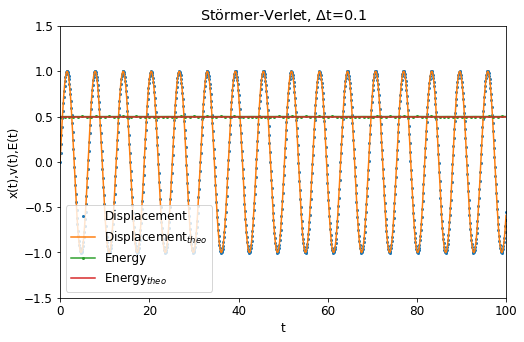

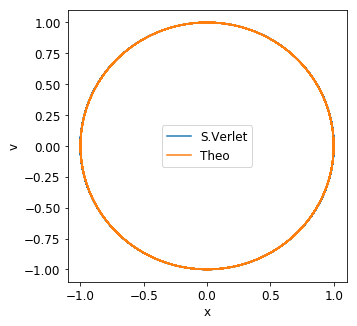

In [17]:
j = 1000
dt = 0.1
a = 0
t = np.arange(j)*dt
theo = np.sin(t)
vtheo = np.cos(t)

x = np.zeros(j)
v = np.zeros(j)
e = np.zeros(j)
Etheo = np.ones(j)*0.5

v[0] = 1

def energy(x,v): return 0.5 * (v*v + x*x)
def next_x(x,v): return x + v * dt
def next_v(v,a): return v - dt * 0.5 * a

for i in range(j-1):
    v[i+1] = next_v(v[i],x[i])
    x[i+1] = next_x(x[i],v[i+1])
    v[i+1] = next_v(v[i+1],x[i+1])
    e[i] = energy(x[i],v[i])
    
e[-1] = energy(x[-1],v[-1])

f = plt.figure(figsize=(8,5))

plt.plot(t, x, 'o', label="Displacement", markersize=2)
plt.plot(t, theo, label="Displacement$_{theo}$")

plt.plot(t, e, '-o', label="Energy", markersize=2, markevery=10)
plt.plot(t, Etheo, label="Energy$_{theo}$")

plt.legend(loc=3).draggable()
plt.title(u'Störmer-Verlet, $\Delta$t=0.1')
plt.xlabel('t')
plt.ylabel('x(t),v(t),E(t)')

plt.axis((0,100,-1.5,1.5))
f.show()

pd = np.max(np.abs(Etheo[1:]-e[1:]))/Etheo[0]*100
print('Percentage Max. Error: %.2f' %pd)

g = plt.figure(figsize=(5,5))
plt.plot(x,v, label="S.Verlet")
plt.plot(theo,vtheo, label="Theo")
plt.legend()
plt.xlabel("x")
plt.ylabel("v")
plt.show()

The exercises above are to compare the various methods. It has been determined that the second-order Störmer-Verlet method performs pretty well. Lets apply it to the system of 128-coupled oscillators.

Define a helper function below for the Störmer-Verlet time-stepping.

In [37]:
def sVerlet(N,j,dt):
    x = np.zeros((j,N))
    x[0]= np.sin(np.pi*(np.arange(N)+1.)/(N+1.))
    v = np.zeros((j,N))
    e = np.zeros(j)
    t = np.arange(j)*dt

    Etheo = np.ones(j)*0.5*((x[0,0:-1]-x[0,1:])**2).sum()

    def next_x(x,v): return x - v * dt
    def next_v(v,a): return v + dt * 0.5 * a

    # dV/dx_k = 2x_k - x_(k-1)- x_(k+1)
    def acc(x):
        acc = np.zeros(N)
        for k in range(1,N-1):
            acc[k] = 2 * x[k] - x[k-1] - x[k+1] 
        acc[0] = x[0] - x[1]
        acc[-1] = x[-1] - x[-2]
        return acc

    a = acc(x[0,:])

    for i in range(j-1):
        v[i+1,:] = next_v(v[i,:],a)
        x[i+1,:] = next_x(x[i,:],v[i+1,:])

        a = acc(x[i+1,:])        
        v[i+1,:] = next_v(v[i+1,:],a)

        ke = 0.5*(v[i]**2).sum()
        pe = 0.5*((x[i,0:-1]-x[i,1:])**2).sum()
        e[i+1] = ke+pe
    return e,x,v,t,Etheo

The simulation of an 'ideal' 128-coupled oscillators system with the symplectic Störmer-Verlet method.

Percentage Max. Error: 0.0052


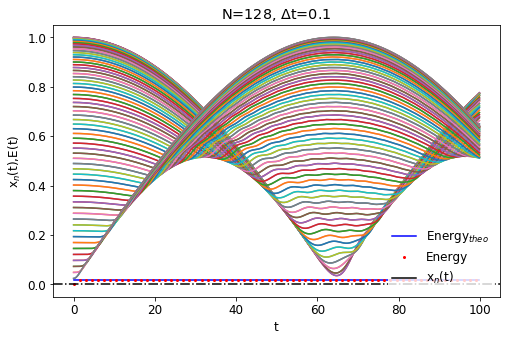

In [34]:
N = 128
dt = 0.1
j = 1000

e,x,v,t,Etheo = sVerlet(N,j,dt)

# Plot figures.
f = plt.figure(figsize=(8,5))
ax = f.add_subplot(1,1,1)
for k in range(N):
    ax.plot(t, x[:,k])

ax.plot(t,Etheo, label="Energy$_{theo}$", color='b')
ax.plot(t, e, 'ro', label="Energy", markevery=15, markersize=2)
ax.axhline(0, color='k', linestyle='-.')

# Create manual legends. Otherwise too many x_n to print.
handles, labels = ax.get_legend_handles_labels()
cusLine = plt.Line2D((0,1),(0,0), color='k')

leg = ax.legend(handles[:2]+[cusLine],labels[:2]+['x$_n$(t)'],loc=4)
#leg.get_frame().set_alpha(0) # transparent background
leg.get_frame().set_edgecolor('white') # transparent border
plt.title('N='+str(N)+', $\Delta$t='+str(dt))
plt.xlabel('t')
plt.ylabel('x$_n$(t),E(t)')

f.show()

energyErr = np.abs(Etheo[1:]-e[1:])
pd = np.max(energyErr)/Etheo[0]*100
print('Percentage Max. Error: %.4f' %pd)

# p = plt.figure(figsize=(5,5))
# plt.plot(x,v)
# p.show()

## Some error plots

Consider the error for the above system of 128-coupled oscillators.

The error increases with longer time horizon.

In [21]:
N = 128
dt = 0.1
k = [10,100,1000,10000,100000,1000000]

energyErrs = np.zeros(len(k))

for j in range(len(k)):
    e,_,_,t,Etheo = sVerlet(N,k[j],dt)
    energyErr = np.max(np.abs(Etheo[1:]-e[1:]))
    energyErrs[j] = energyErr

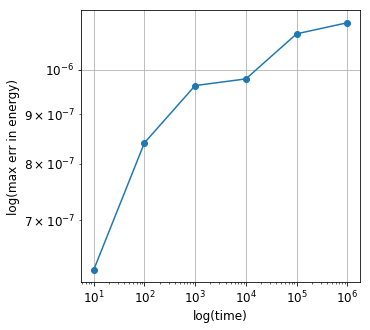

In [26]:
k = [10,100,1000,10000,100000,1000000]

g = plt.figure(figsize=(5,5))
plt.loglog(k,energyErrs, '-o')
plt.xlabel("log(time)")
plt.ylabel("log(max err in energy)")
plt.grid()
plt.show()

The error decreases with temporal step-size, $\Delta t$.

In [39]:
N = 128
dt = [1.,0.1,0.01,0.001,0.0001]
j0 = 1000

energyErrs1 = np.zeros(len(dt))

for j in range(len(dt)):
    e,_,_,t,Etheo = sVerlet(N,j0,dt[j])
    energyErr = np.max(np.abs(Etheo[1:]-e[1:]))
    energyErrs1[j] = energyErr

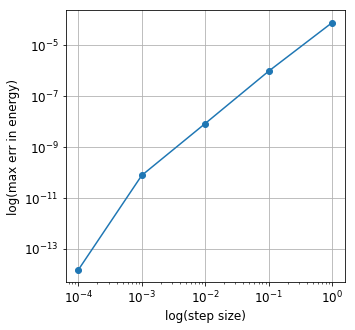

In [41]:
g = plt.figure(figsize=(5,5))
plt.loglog(dt,energyErrs1, '-o')
plt.xlabel("log(step size)")
plt.ylabel("log(max err in energy)")
plt.grid()
plt.show()